<a href="https://colab.research.google.com/github/FernandoJRS/violence-detection-deeplearning/blob/main/ViolenceActionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sklearn
import random
import time
import cv2
import logging
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
def cv2plt(img):
    plt.figure(figsize=(4,4))        # To change the size of figure
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)  
    plt.show()


In [3]:
def extract_video_optical_flow(input_file_path, output_folder, height=600, width=800):
    video_frames_optical_flow = []
    i = 0
    fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
    file_name = input_file_path.split('\\')[4].split('.')[0]
    output_file = os.path.join(output_folder, file_name+'.avi')
    frames_folder = os.path.join(output_folder, file_name)
    os.makedirs(frames_folder, exist_ok=True)

    cap = cv2.VideoCapture(input_file_path)
    ret, frame = cap.read()
    width, height = frame.shape[1], frame.shape[0]
    vid_writer = cv2.VideoWriter(output_file, fourcc, 30, (width, height))
    prvs = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    hsv = np.zeros_like(frame)
    hsv[..., 1] = 255

    if not cap.isOpened():
        print("Error opening video stream or file")
    
    cnt=0
    while cap.isOpened():

        ret2, frame2 = cap.read()

        if ret2:

            frame2 = cv2.resize(frame2, (width, height))
            next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
            flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
            hsv[..., 0] = ang * 180 / np.pi / 2
            hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
            bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
            cv2.imwrite(f'{frames_folder}/{cnt}.jpg',bgr)
            video_frames_optical_flow.append(bgr)
            vid_writer.write(bgr)
            cv2.waitKey(1)
            cnt +=1
        else:
            break

        i += 1
        prvs = next
    
    cap.release()
    vid_writer.release()
    cv2.destroyAllWindows()
    
    return video_frames_optical_flow

In [4]:
def extract_frames(input_file_path, output_folder, height=640, width=480):

    i = 0
    file_name = input_file_path.split('\\')[4].split('.')[0]
    output_file = os.path.join(output_folder, file_name)
    frames_folder = os.path.join(output_folder, output_file)
    s=os.makedirs(frames_folder, exist_ok=True)
    print('frames_folder :', frames_folder)
    cap = cv2.VideoCapture(input_file_path)
    ret, frame = cap.read()
    width, height = frame.shape[1], frame.shape[0]
    print('width :', width, 'height :', height)

    if not cap.isOpened():
        print("Error opening video stream or file")
    
    cnt=0
    while cap.isOpened():

        ret1, frame = cap.read()

        if ret1:

            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            cv2.imwrite(f'{frames_folder}/{cnt}.jpg', rgb)
            cnt +=1
        else:
            break

        i += 1
    
    return

In [5]:
pwd = os.getcwd()
files = glob(pwd+'/data/*.mp4')
opt_flow_folder = pwd+'/opt_flow_frames'
video_frames = pwd+'/frames'
# logger = logging.getLogger('optical flow extraction')
# logger.info("Start tracking.")
for file in files:
    time0 = time.time()
    optical_flow = extract_video_optical_flow(file, opt_flow_folder)
    extract_frames(file, video_frames)
    print(f'{file} time taken : {round((time.time() - time0),2)} secs')

frames_folder : d:\Umitron\sw-ml-20230126-powlook\estimating_fish_activity_in_videos/frames\85323
width : 480 height : 640
d:\Umitron\sw-ml-20230126-powlook\estimating_fish_activity_in_videos/data\85323.mp4 time taken : 280.5 secs
frames_folder : d:\Umitron\sw-ml-20230126-powlook\estimating_fish_activity_in_videos/frames\85393
width : 480 height : 640
d:\Umitron\sw-ml-20230126-powlook\estimating_fish_activity_in_videos/data\85393.mp4 time taken : 493.2 secs
frames_folder : d:\Umitron\sw-ml-20230126-powlook\estimating_fish_activity_in_videos/frames\85551
width : 480 height : 640
d:\Umitron\sw-ml-20230126-powlook\estimating_fish_activity_in_videos/data\85551.mp4 time taken : 427.07 secs
frames_folder : d:\Umitron\sw-ml-20230126-powlook\estimating_fish_activity_in_videos/frames\85555
width : 480 height : 640
d:\Umitron\sw-ml-20230126-powlook\estimating_fish_activity_in_videos/data\85555.mp4 time taken : 402.84 secs
frames_folder : d:\Umitron\sw-ml-20230126-powlook\estimating_fish_activity

### Exploratory Data Analysis of image frames from videos

#### To study the histrograms of the video frames of the 10 videos to understand the light distributions

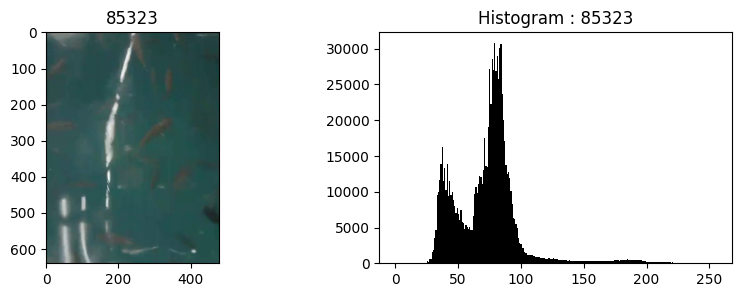

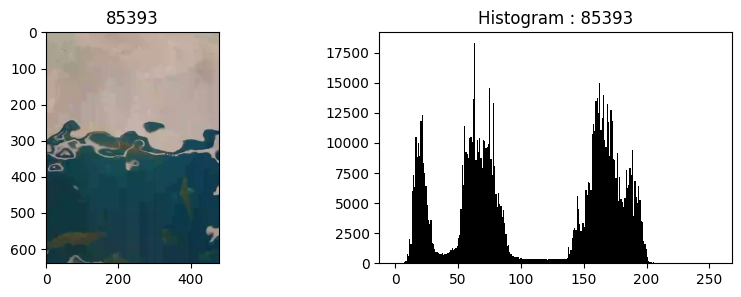

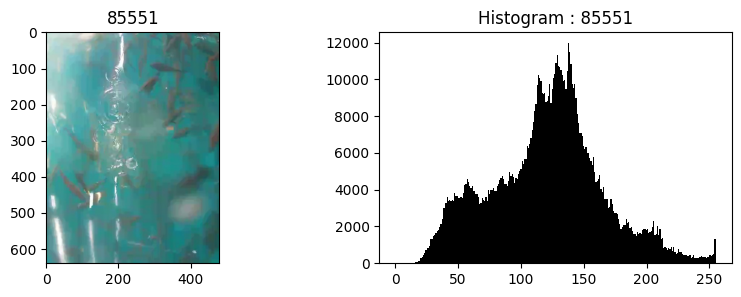

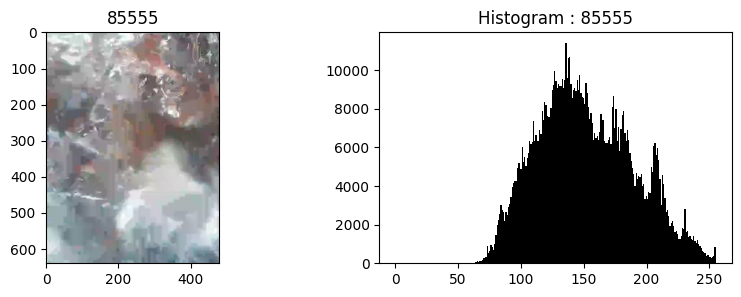

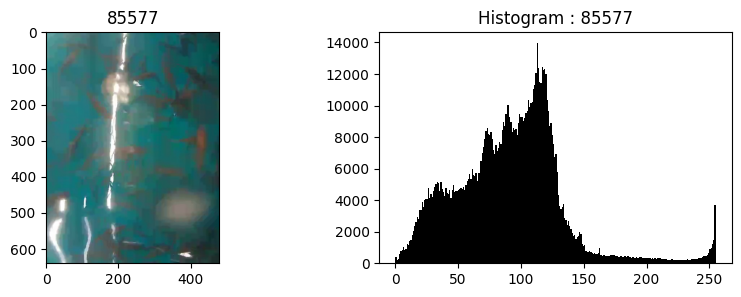

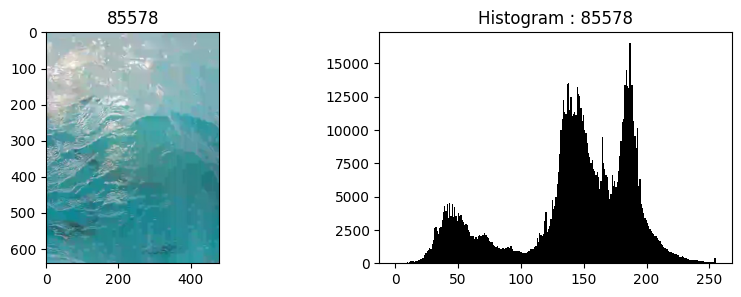

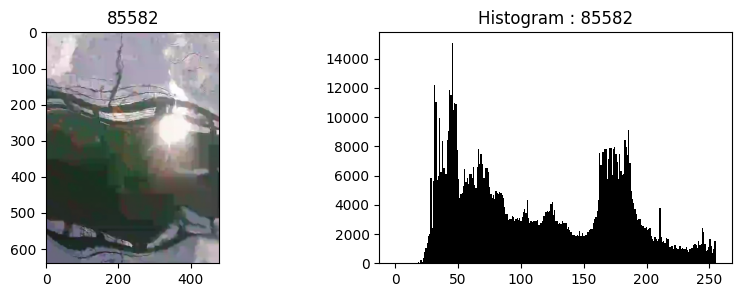

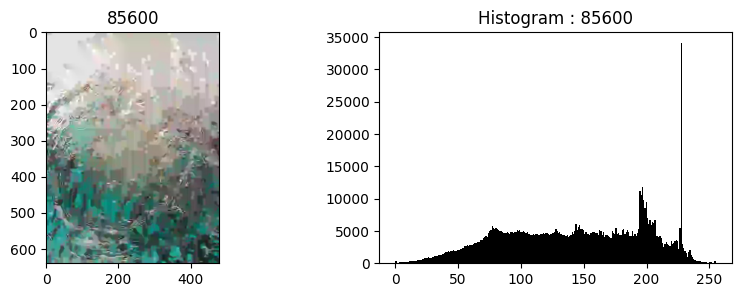

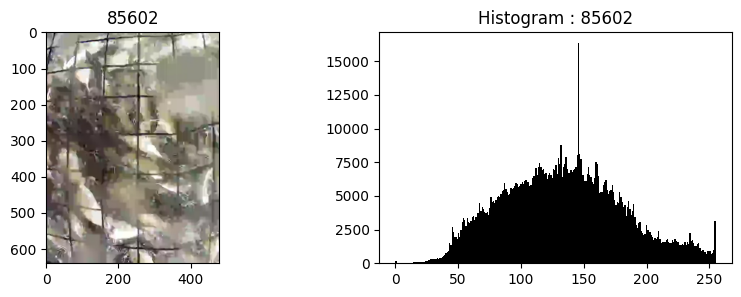

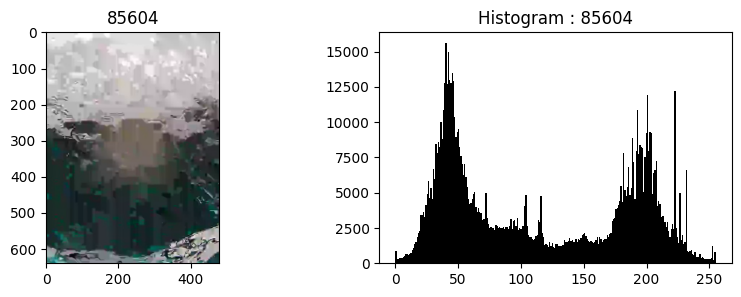

In [70]:
frames_folder = os.listdir(pwd+'/frames')
for fld in frames_folder:
    files = glob(pwd+'/frames/'+fld+'/*.jpg')
    for file in files[0:1]:
        img = cv2.imread(file)
        #img = img[:,:,0]
        plt.figure(figsize=(10,3))
        plt.subplot(1, 2, 1)
        plt.title(fld)
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)
        plt.subplot(1,2,2)
        plt.hist(img.ravel(), 256, [0,255], facecolor= 'black')
        plt.title(f'Histogram : {fld}')
        plt.show()

Comment on the histograms :

The histograms of the videos are much difference from each other. The peaks of some of the highest concentration varying across the different brightless level ( 0 - 255). What is expected of the reflections which is expected to be bright does not show up as such on the histogram. Even within each videos the histograms across frames also changes.

It is therefore difficult to set a thresholding level to filter off any bright lights.

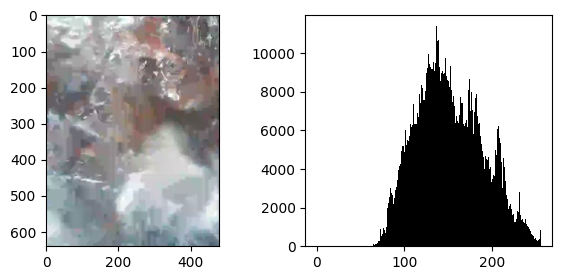

In [60]:
pwd = os.getcwd()
file_path = pwd+'/frames/85555'
files = glob(file_path+'/*.jpg')
for file in files[0:1]:
    img = cv2.imread(file)
    #img = img[:,:,0]
    plt.figure(figsize=(7,3))
    plt.subplot(1, 2, 1)
    plt.imshow(img,cmap='gray',vmin=0,vmax=255)
    plt.subplot(1,2,2)
    plt.hist(img.ravel(), 256, [0,255], facecolor= 'black')
    plt.show()

### Attempted thresholding on the image frames

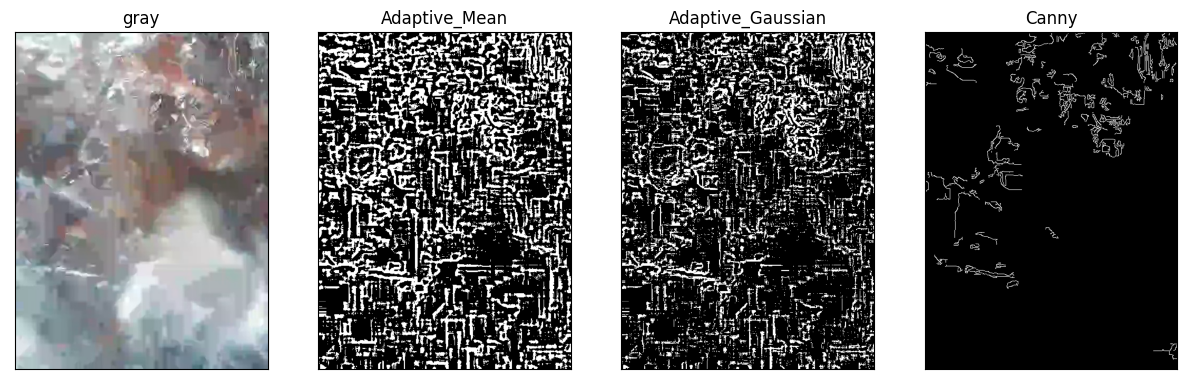

In [61]:
th2 = cv2.adaptiveThreshold(img[:,:,0],255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY_INV,11,2)
th3 = cv2.adaptiveThreshold(img[:,:,0],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,11,2)
cann= cv2.Canny(img, 31, 191, apertureSize=3)

titles = ['gray','Adaptive_Mean','Adaptive_Gaussian', 'Canny']
images = [img, th2, th3, cann]
plt.figure(figsize=(15,5))
for i in range(4):
    plt.subplot(1,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Attempted filtering on the images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


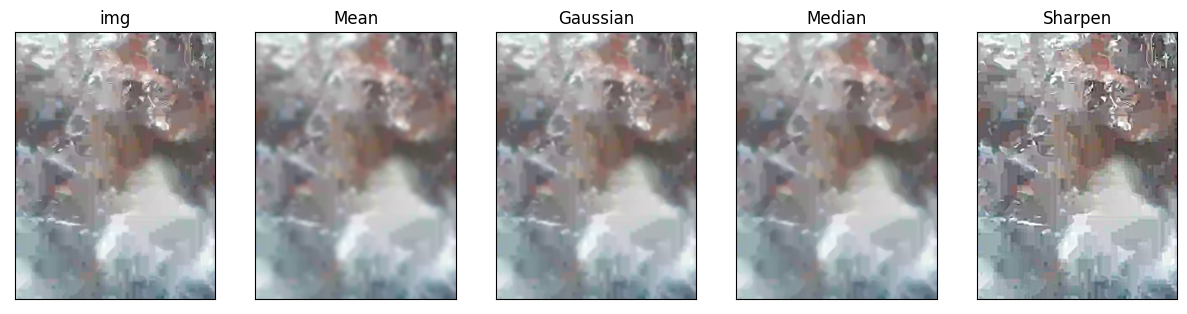

In [64]:
mflt = cv2.blur(img, (11,11))
gaus = cv2.GaussianBlur(img, (11,11), 0)
medf = cv2.medianBlur(img, 11)
krn  = np.ones((11,11), np.float32)/121
mnuc = cv2.filter2D(img, -1, krn)
detail = (np.float32(img)*2 - np.float32(mnuc))/255


titles = ['img','Mean','Gaussian','Median','Sharpen']
images = [img, mflt, gaus, medf, detail]
plt.figure(figsize=(15,7))
for i in range(5):
    plt.subplot(1,5,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

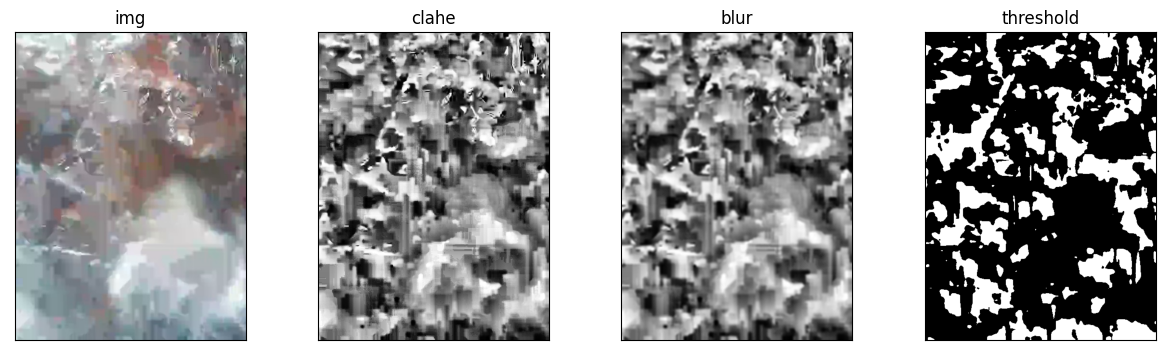

In [69]:
clahe = cv2.createCLAHE()
img_clahe = clahe.apply(img[:,:,0])
img_blur = cv2.blur(img_clahe, (5,5))
(_,img_th) = cv2.threshold(255-img_blur, 160, 255, cv2.THRESH_BINARY)

titles = ['img','clahe','blur','threshold']
images = [img, img_clahe, img_blur, img_th]
plt.figure(figsize=(15,4))
for i in range(4):
    plt.subplot(1,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

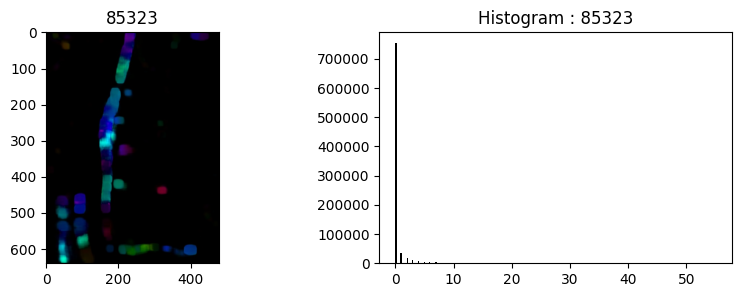

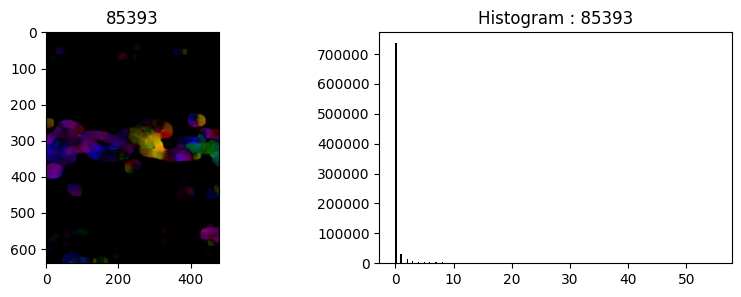

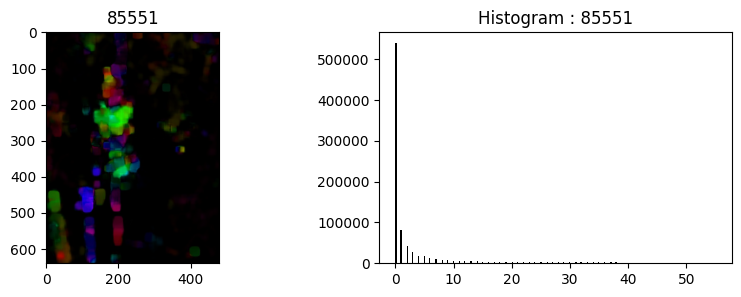

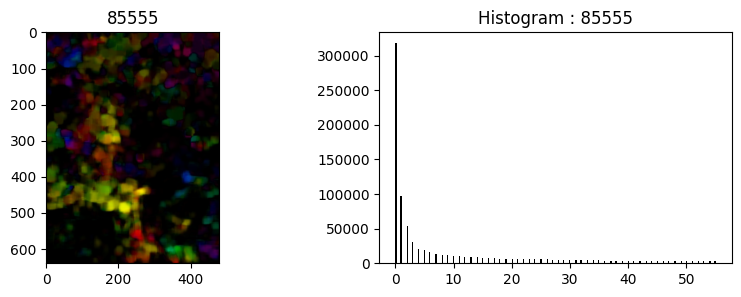

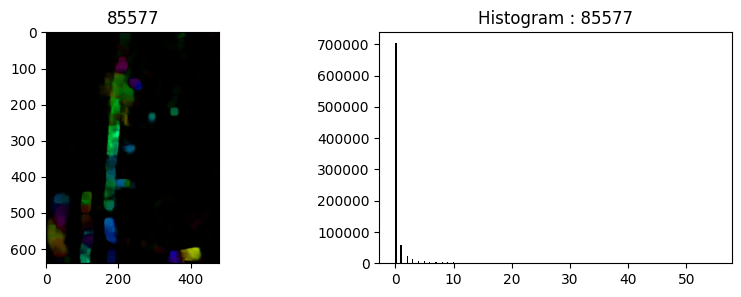

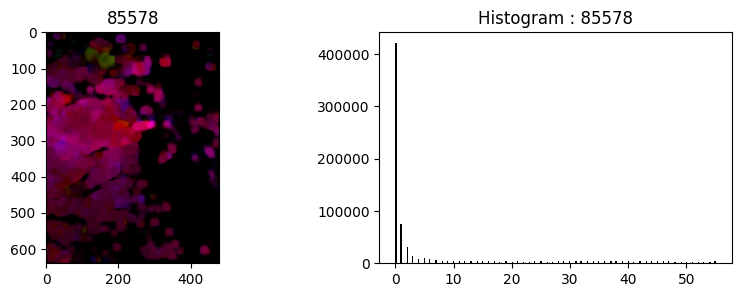

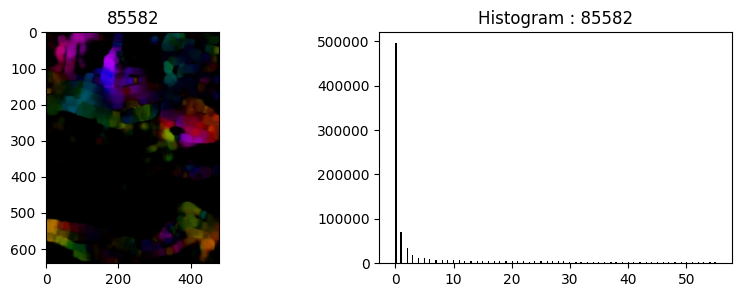

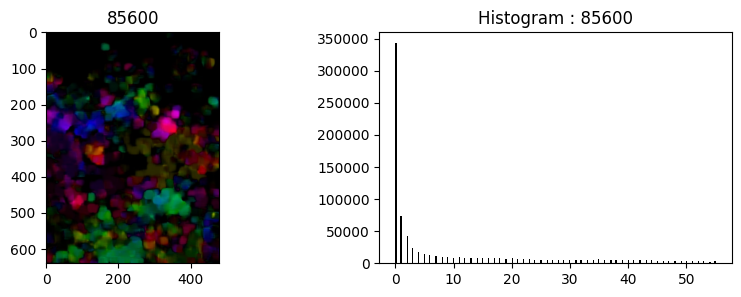

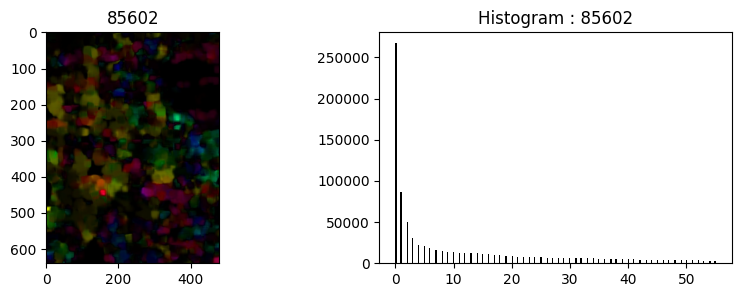

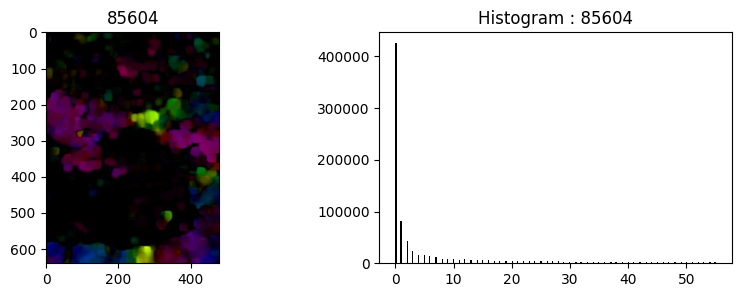

In [73]:
frames_folder = os.listdir(pwd+'/opt_flow_frames')
for fld in frames_folder:
    files = glob(pwd+'/opt_flow_frames/'+fld+'/*.jpg')
    for file in files[0:1]:
        img = cv2.imread(file)
        #img = img[:,:,0]
        plt.figure(figsize=(10,3))
        plt.subplot(1, 2, 1)
        plt.title(fld)
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)
        plt.subplot(1,2,2)
        plt.hist(img.ravel(), 256, [0,55], facecolor= 'black')
        plt.title(f'Histogram : {fld}')
        plt.show()

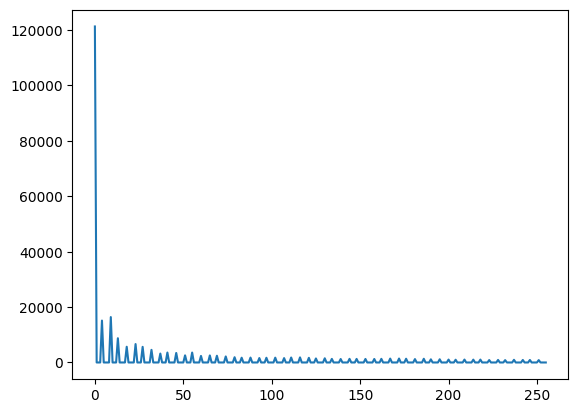

In [81]:
histg = cv2.calcHist([img],[0],None,[256],[0,55]) 
plt.plot(histg)
plt.show()